In [73]:
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
import datetime
import pandas_datareader as pdr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


# Example: Facebook

In [96]:
start = datetime.datetime(2021, 1, 4)
end = datetime.datetime(2021, 8,25)

In [97]:
# downlaod data
sp500 = web.DataReader(['sp500'], 'fred', start, end)
FB = yf.download('FB', start , end)

[*********************100%***********************]  1 of 1 completed


In [98]:
# combine two datasets
sp500 = sp500.reset_index() 
FB = FB.reset_index()
FB = FB[['Date','Close']]
FB.columns = ['Date','FB']

sp500.columns = ['Date','sp500']
data = pd.merge(FB, sp500, on='Date')

In [99]:
# calculate the return
x = np.array(data ['sp500'].pct_change(1))[1:]
y = np.array(data ['FB'].pct_change(1))[1:]

In [94]:
# add constant column
x1 = sm.add_constant(x)

# make regression model 
model = sm.OLS(y, x1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     74.63
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           5.70e-15
Time:                        23:44:25   Log-Likelihood:                 446.25
No. Observations:                 161   AIC:                            -888.5
Df Residuals:                     159   BIC:                            -882.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.400      0.6

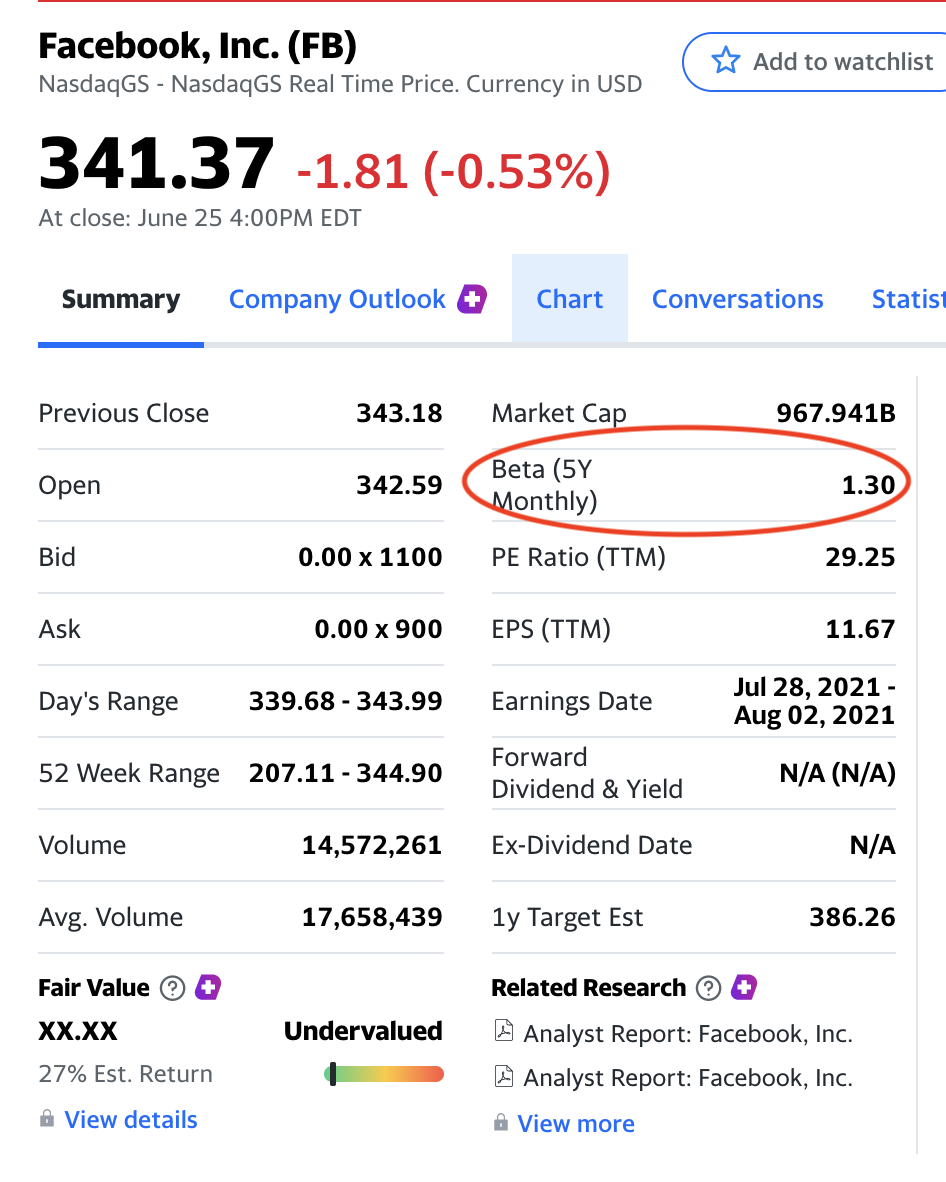